## Load dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import photofitt
from photofitt import display
from photofitt.analysis import quantify_peaks, cummulative_motion

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load UV mitosis data:
folder = "/Users/esti/Documents/PROYECTOS/PHX/DOCS/MANUSCRIPT/CODE/"
path_data = os.path.join(folder, "data/mitosis_CHO_UV_clean.csv")
data = pd.read_csv(path_data)
print(len(data))

95348


## Estimation of cell densities for each field of view

Each well is 9.3 X 8.7 mm. Each FOV (the one in the final images) is 660 X 660 microns

- Area of each well: 80.91 mm^2
- Area of each FOV: 0.4356 mm ^2
- Total # of cells per well: 40000 per well
- Total# of cells per FOV: 215.35


In [3]:
well_area = 80.91
cell_density = 25000
fov_area = 660
fov_mm = (fov_area*0.001)**2
cell_mm = cell_density / well_area
cell_fov = cell_mm * fov_mm
print(cell_fov)

134.59399332591772


/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/display/plots.py:79: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=y_var, hue=condition, data=data,
/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/display/plots.py:79: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=y_var, hue=condition, data=data,
/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/display/plots.py:79: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=y_var, hue=condition, data=data,
/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/display/plots.py:79: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=y_var, hue=condit

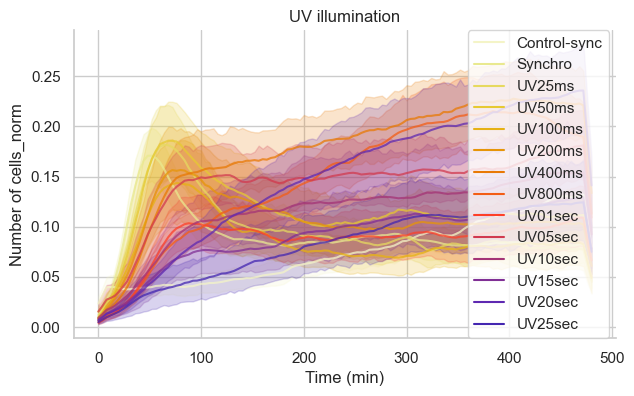

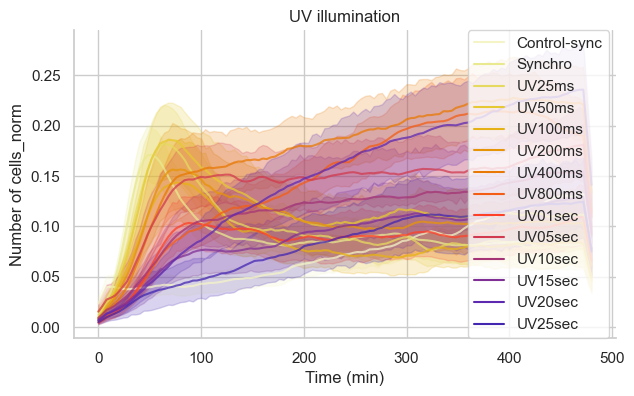

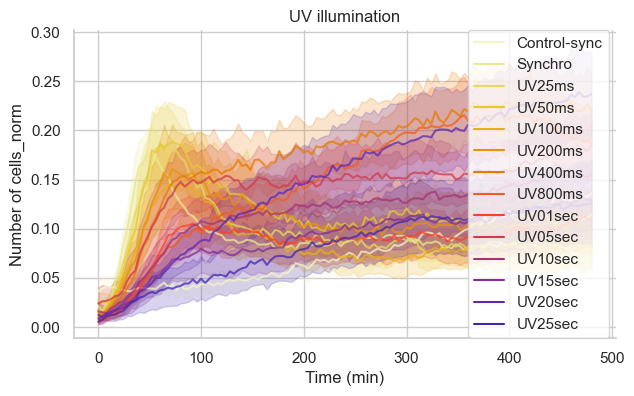

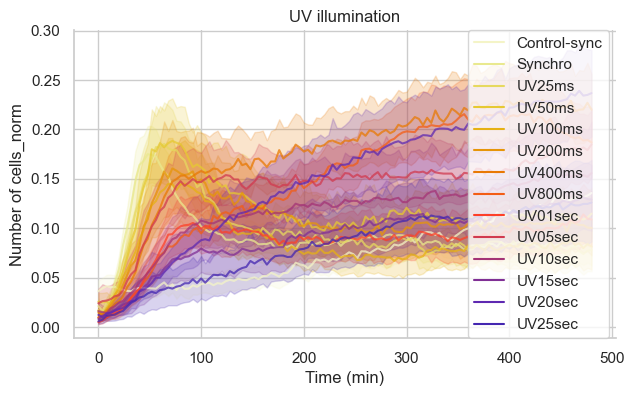

In [4]:
## Rename the columns to get the proper naming of the axis
data = data.rename(columns={'mitosis': 'Number of cells', 
                            'mitosis_normalised': 'Norm. Number of cells'})
## Choose a path to store the data:
output_path = folder 
## There is raw and smooth data. We show the smooth data (with a moving average of kernel 5) for the plots.
groups = np.unique(data["processing"])
## name of the variable to display in the plot.
y_var = "Number of cells" # "Norm. Number of cells"
cell_fov = 134.59
norm = True 
if norm is True:
    data[y_var + '_norm'] = data[y_var]/cell_fov
    plot_y_var = y_var + '_norm'
else:
    plot_y_var = y_var

fig_format = ["png", "pdf"]
for g in groups:
    # sns.set_style()
    ploting_data = data[data["processing"]==g].reset_index(drop=True)
    title = "UV illumination"
    condition = "Subcategory-02"
    hue_order = ['Control-sync', 'Synchro', 'UV25ms', 'UV50ms', 'UV100ms', 'UV200ms', 'UV400ms', 'UV800ms',
                 'UV01sec', 'UV05sec', 'UV10sec', 'UV15sec', 'UV20sec', 'UV25sec']
    for f in fig_format:
        format_extension = 'pdf'
        name = "{0}_{1}.{2}".format(plot_y_var, g, f)
        display.conditions(ploting_data, plot_y_var, title, condition, output_path, name, style_condition=None,
                        hue_order=hue_order, palette=sns.color_palette("CMRmap_r", 17))
        


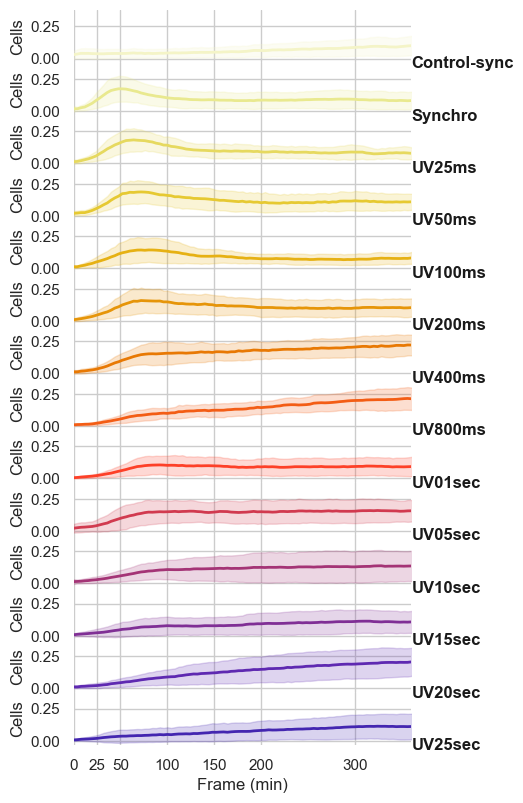

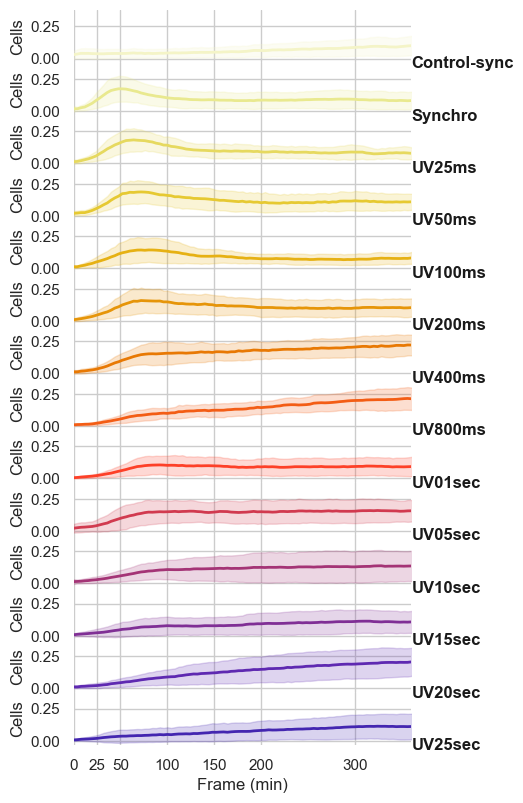

In [5]:
## Order the data for the plot
hue_order = ['Control-sync', 'Synchro', 'UV25ms', 'UV50ms', 'UV100ms', 'UV200ms', 'UV400ms', 'UV800ms',
             'UV01sec', 'UV05sec', 'UV10sec', 'UV15sec', 'UV20sec', 'UV25sec'] 
fig_format = ["png", "pdf"]
for f in fig_format:
    name = "{0}.{1}".format(plot_y_var, f) # name we want to give to the plot
    new_name="cells_vertical_subplots_{}".format(name)

    display.vertical_distributions(data, plot_y_var, output_path, new_name, raw="Subcategory-02", hue="Subcategory-02", 
                                   hue_order=hue_order, palette=sns.color_palette("CMRmap_r", 17))

## Plot peak data

### Calculate the mitosis peaks for each video

In [6]:
y_var = "Number of cells" # "Norm. Number of cells"
cell_fov = cell_fov # 134.59
norm = True 
if norm is True:
    data[y_var + '_norm'] = data[y_var]/cell_fov
    plot_y_var = y_var + '_norm'
else:
    plot_y_var = y_var
    
# Integrate the information about the temporal peaks of mitosis
data_peaks = quantify_peaks(data, plot_y_var)

data_peaks = photofitt.utils.numerical_dose(data_peaks, column_name="Subcategory-02", power=85)

### Display the peak information for each condition

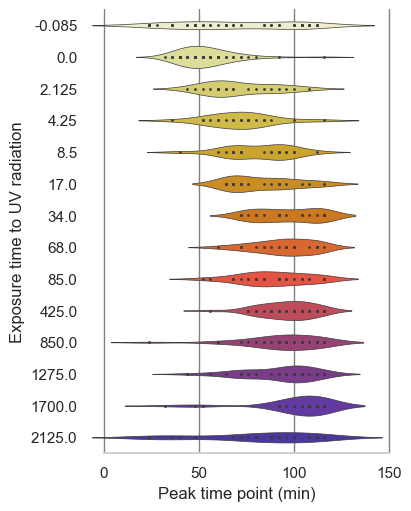

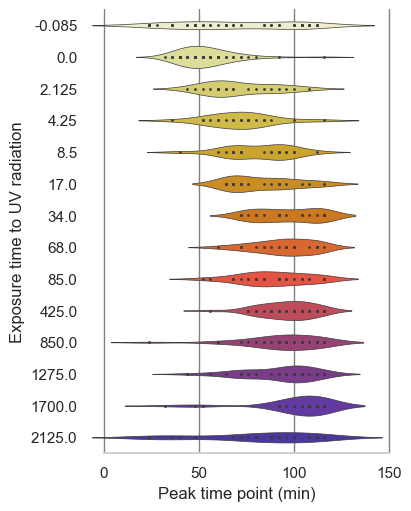

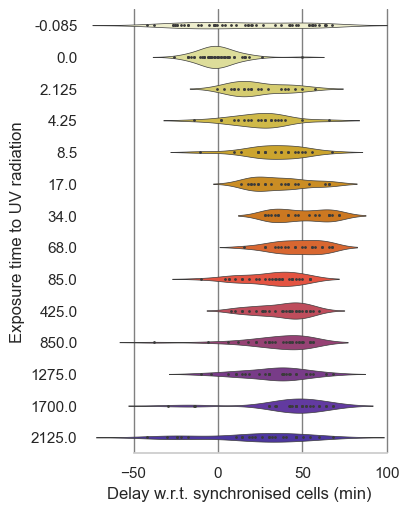

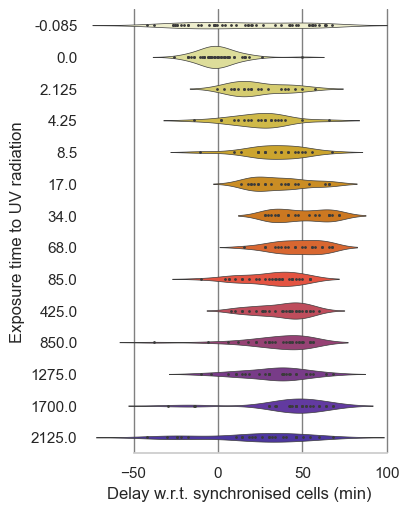

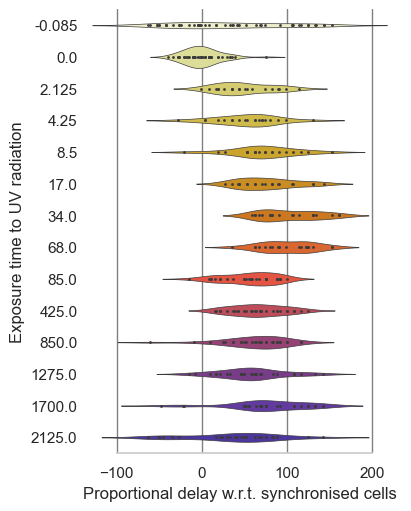

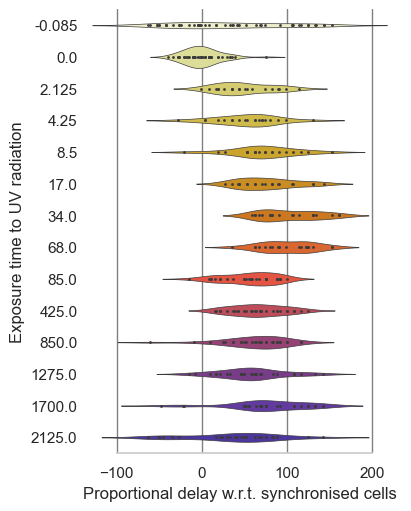

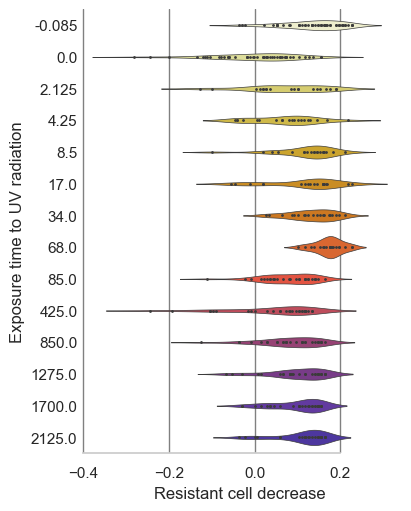

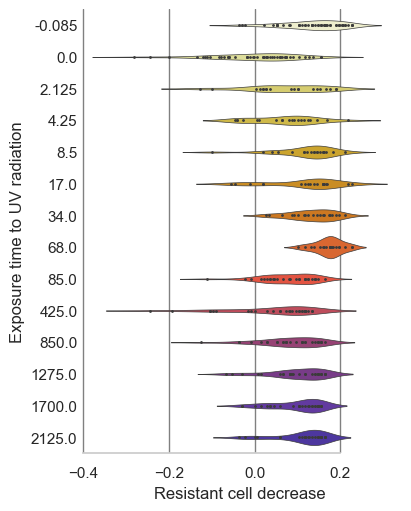

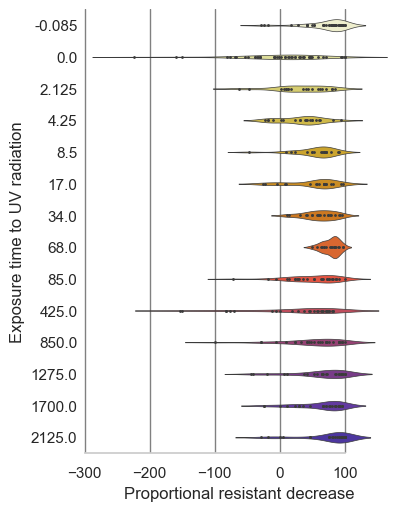

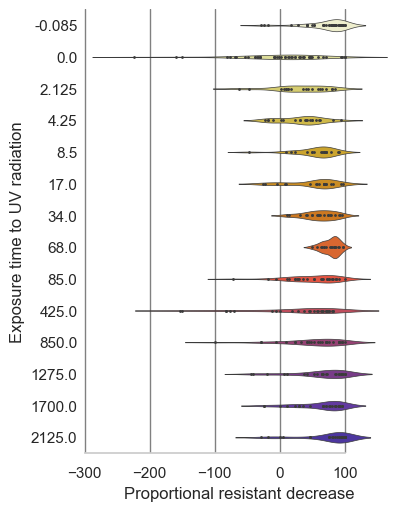

In [17]:
#### Show each distribution with both violins and points

hue_order = ["-8.500e-02",  "0.000e+00",  "2.125e+00",  "4.250e+00",  "8.500e+00",
        "1.700e+01",  "3.400e+01",  "6.800e+01",  "8.500e+01",  "4.250e+02",
        "8.500e+02",  "1.275e+03",  "1.700e+03",  "2.125e+03"]

hue_order = [-8.500e-02,  0.000e+00,  2.125e+00,  4.250e+00,  8.500e+00,
        1.700e+01,  3.400e+01,  6.800e+01,  8.500e+01,  4.250e+02,
        8.500e+02,  1.275e+03,  1.700e+03,  2.125e+03]


## Rename the columns to get the proper naming in the plots
data_peaks = data_peaks.rename(columns={'peak_time': 'Peak time point (min)', 
                            'delay_synchro': 'Delay w.r.t. synchronised cells (min)',
                           'proportional_delay_synchro': 'Proportional delay w.r.t. synchronised cells'})

x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells", "Resistant cell decrease",
         "Proportional resistant decrease"]
fig_format = ["png", "pdf"]
for x in x_var:
    for f in fig_format:
        name = "{0}.{1}".format(x, f) # name we want to give to the plot
        new_name="peaktime_violin_horizontal_exposure_time{}".format(name)
 #       display.violinplots_horizontal(data_peaks,"Subcategory-02", x, output_path, new_name, hue_order,
 #                              palette=sns.color_palette("CMRmap_r", 17))
        display.violinplots_horizontal(data_peaks,'Light dose', x, output_path, new_name, hue_order,
                               palette=sns.color_palette("CMRmap_r", 17))
        
    

/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/display/plots.py:201: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  f = sns.catplot(
/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/display/plots.py:201: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  f = sns.catplot(
/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/display/plots.py:201: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  f = sns.catplot(
/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/display/plots.py:201: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  f = sns.catplot(
/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/display/plots.py:201: UserWarning: The palette list has more values (17)

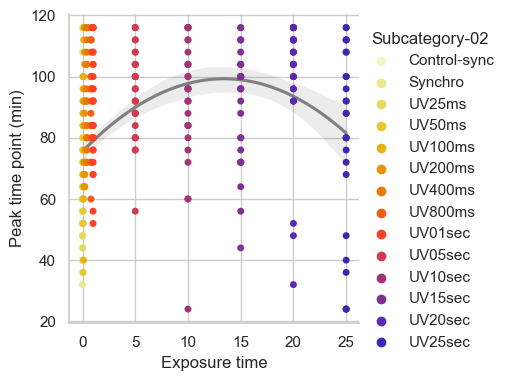

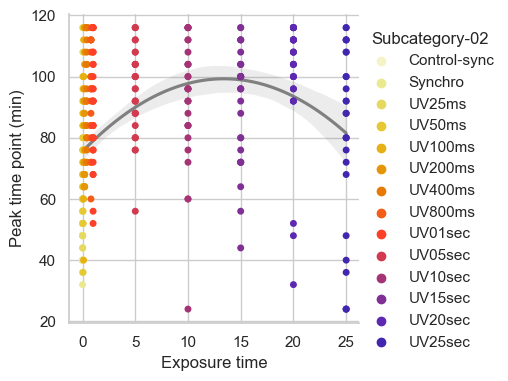

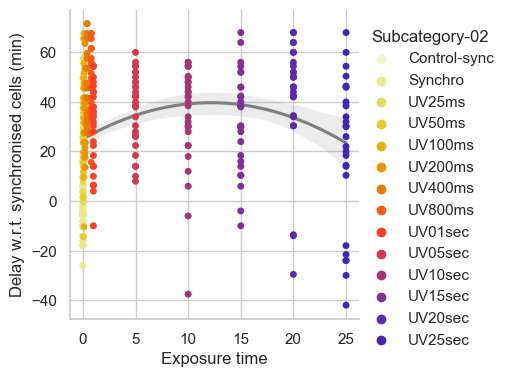

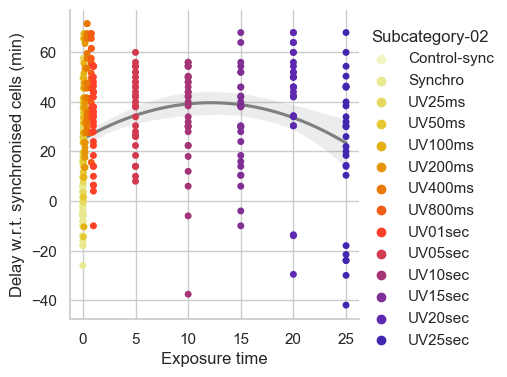

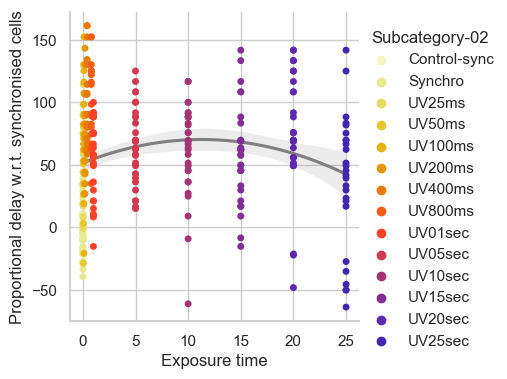

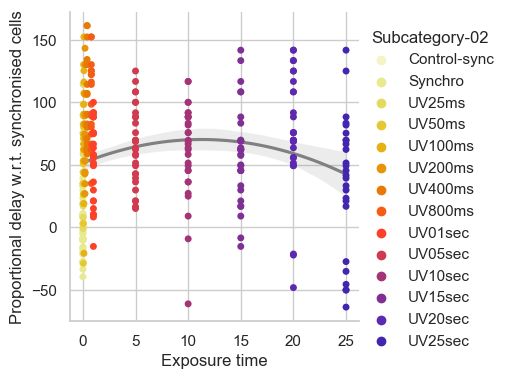

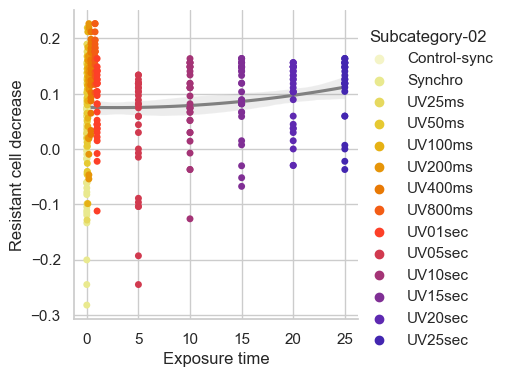

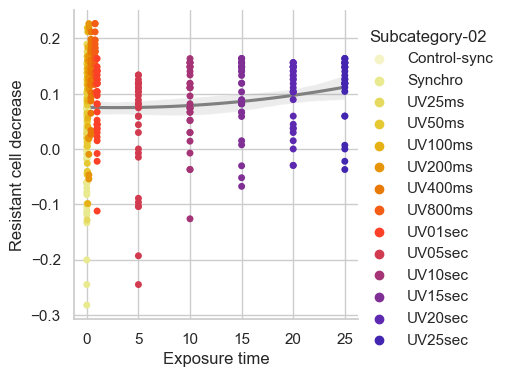

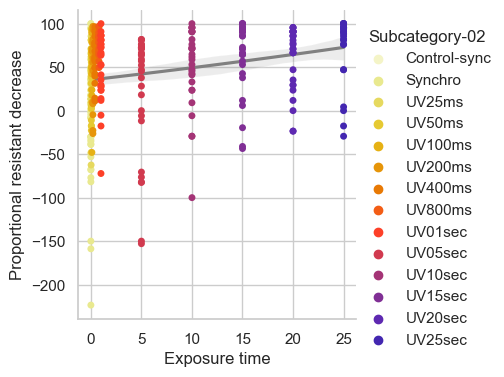

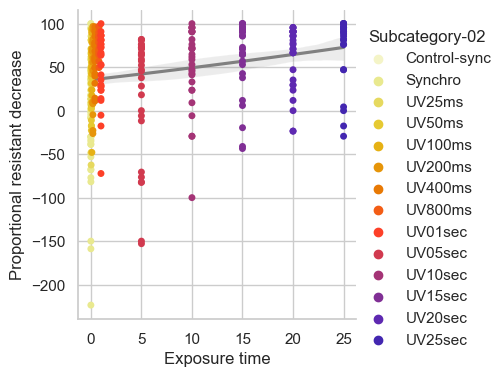

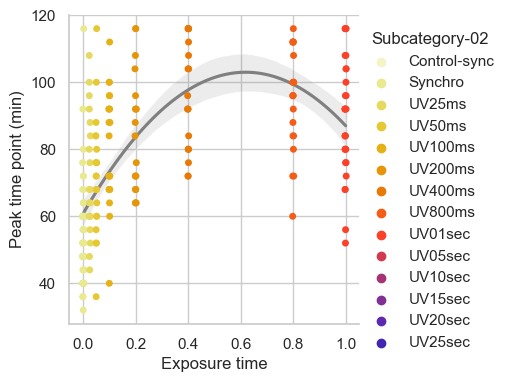

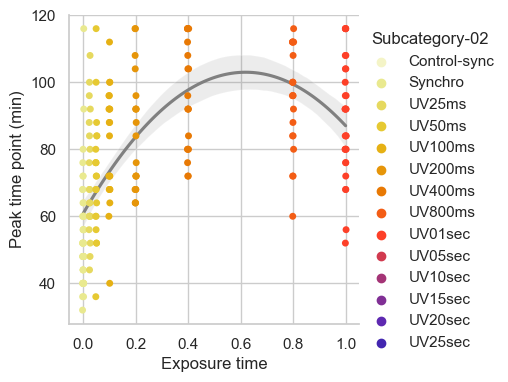

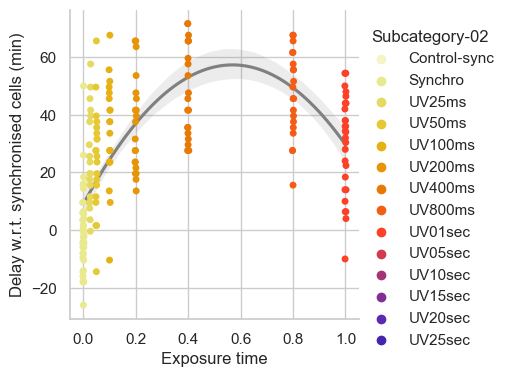

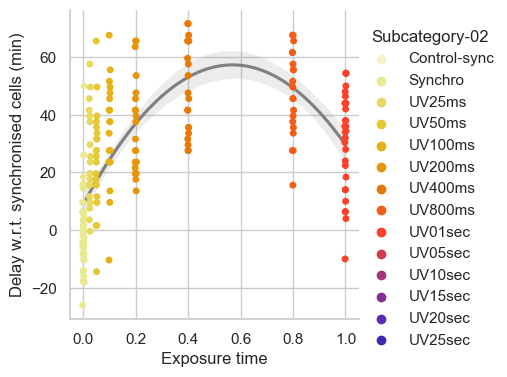

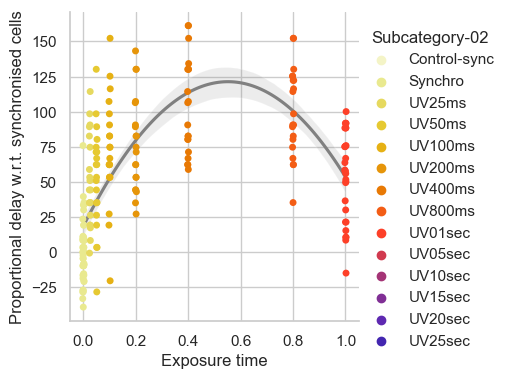

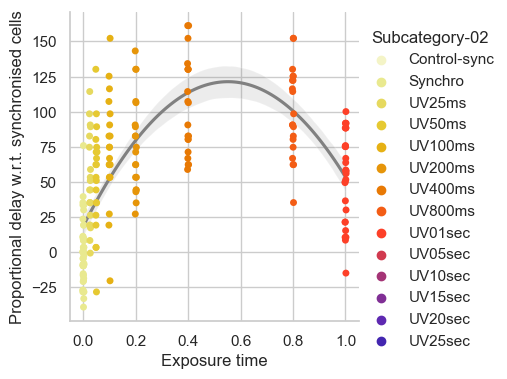

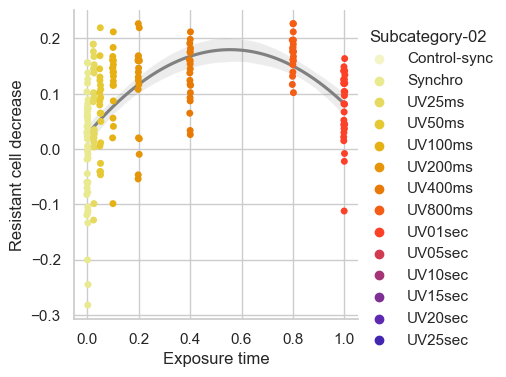

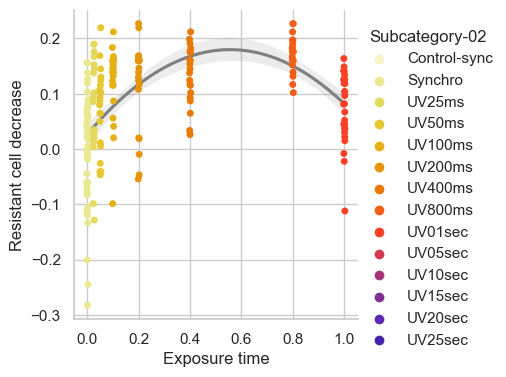

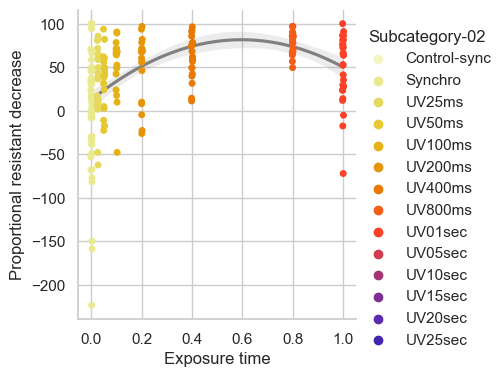

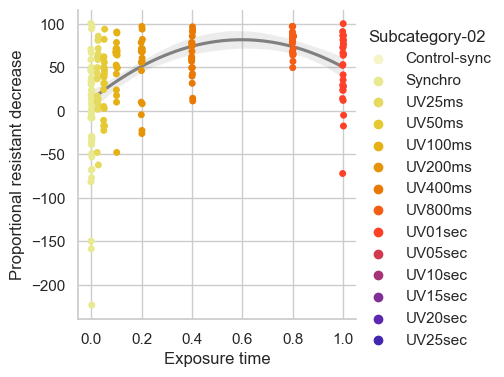

In [19]:

hue_order = ['Control-sync', 'Synchro', 'UV25ms', 'UV50ms', 'UV100ms', 'UV200ms', 'UV400ms', 'UV800ms',
             'UV01sec', 'UV05sec', 'UV10sec', 'UV15sec', 'UV20sec', 'UV25sec'] 
data_peaks_regression = data_peaks[data_peaks["Exposure time"]>=0]
#data_peaks_regression = data_peaks_regression[data_peaks_regression["Exposure time"]<=1]
x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells", "Resistant cell decrease",
         "Proportional resistant decrease"]
fig_format = ["png", "pdf"]
for x in x_var:
    for f in fig_format:
        name = "{0}.{1}".format(x, f) # name we want to give to the plot
        new_name="peaktime_regression_{}".format(name)
        display.regressionfit(data_peaks_regression, x, "Exposure time", output_path, new_name, 
                              hue="Subcategory-02", hue_order=hue_order, spline_order=2,
                              height=4, aspect=1, palette=sns.color_palette("CMRmap_r", 17))
        
data_peaks_regression = data_peaks_regression[data_peaks_regression["Exposure time"]<=1]
for x in x_var:
    for f in fig_format:
        name = "{0}.{1}".format(x, f) # name we want to give to the plot
        new_name="peaktime_regression_limited_{}".format(name)
        display.regressionfit(data_peaks_regression, x, "Exposure time", output_path, new_name, 
                              hue="Subcategory-02", hue_order=hue_order, spline_order=2,
                              height=4, aspect=1, palette=sns.color_palette("CMRmap_r", 17))


## Display cell motion after mitosis

/var/folders/2m/yqllfkcd3gs5_3tz_4m5h85m0000gp/T/ipykernel_19555/31358700.py:25: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=y_var, hue=hue, data=motion_metrics,


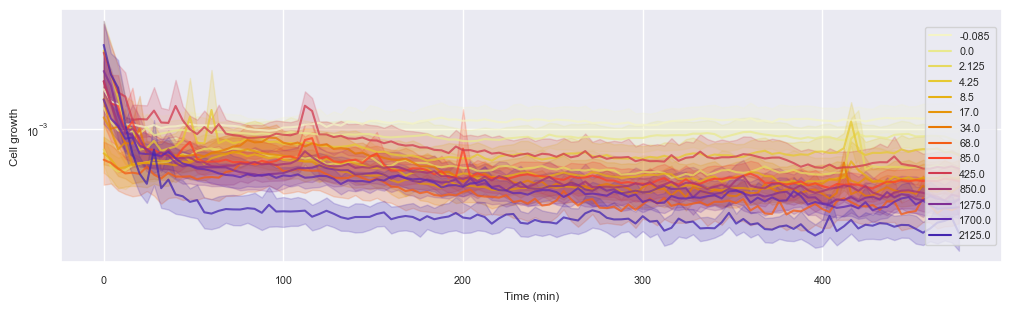

In [22]:
## Path to the cell growth data:
# Load UV mitosis data:
path_growth_data = os.path.join(folder, "data/dynamics_intensity_WL UV - high density.csv")
motion_metrics = pd.read_csv(path_growth_data)
motion_metrics = photofitt.utils.numerical_dose(motion_metrics, column_name="Subcategory-02", power=85)
motion_metrics = motion_metrics.rename(columns={'time_variance': 'Cell growth'})
y_var = "Cell growth"
hue="Light dose" # "Subcategory-02"
hue_order = np.unique(motion_metrics["Light dose"])

format_extension = 'pdf'
name = "cell_growth.{}".format(format_extension)

# display.plot_mitosis(motion_metrics, output_path, hue_order, y_var, graph_format=format_extension)
#display.plot_conditions(motion_metrics, y_var, "Cell growth after mitosis", "Subcategory-02", 
#                        output_path, name, style_condition="Subcategory-01", hue_order=hue_order)


fig = plt.figure(figsize=(10,3), constrained_layout=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.plotting_context("paper")
sns.set_theme(style="ticks", rc=custom_params)
sns.set(font_scale=0.7)
# Plot the results per category
sns.lineplot(x="frame", y=y_var, hue=hue, data=motion_metrics,
             palette=sns.color_palette("CMRmap_r", 17), linewidth=1.5, 
             alpha=0.75, hue_order=hue_order)
# plt.ylabel(y_label)
plt.xlabel("Time (min)")
plt.yscale("log")
plt.legend(loc='right')
format_extension = name.split(".")[-1]
format_extension = 'pdf'
name = "cell_growth.{}".format(format_extension)
fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)
format_extension = 'png'
name = "cell_growth.{}".format(format_extension)
fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)


### Analysis of the cell growth after the peak in mitosis
We will average the dynamics and compute the cummulative sum after mitosis to estimate the dynamics of the daughter cells growing

In [23]:
motion_dataframe, motion_metrics = cummulative_motion(dynamics_metrics, data_peaks, peak_timepoint=True)

ImportError: cannot import name 'cummulative_motion' from 'photofitt.analysis' (/Users/esti/mambaforge/envs/photofitt/lib/python3.9/site-packages/photofitt/analysis/__init__.py)

#### Display the cummulative results

/var/folders/2m/yqllfkcd3gs5_3tz_4m5h85m0000gp/T/ipykernel_51420/1413243859.py:14: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=y_var, hue="Subcategory-02", data=dynamics_metrics,


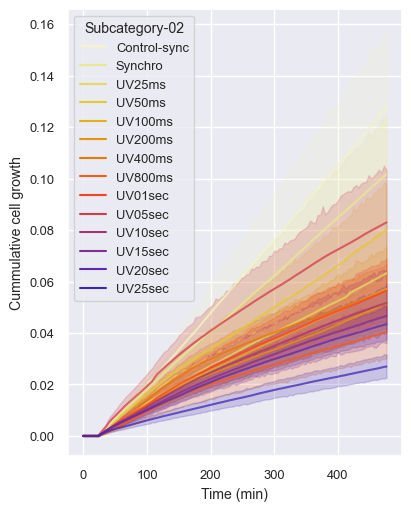

In [13]:
y_var = "Cummulative cell growth"
format_extension = 'pdf'
name = "cell_cummulative_growth_from0.{}".format(format_extension)

#display.plot_conditions(dynamics_metrics, y_var, "Cummulative cell growth after mitosis", "Subcategory-02", 
#                        output_path, name, style_condition="Subcategory-01", hue_order=hue_order)

fig = plt.figure(figsize=(4, 5), constrained_layout=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.plotting_context("paper")
sns.set_theme(style="ticks", rc=custom_params)
sns.set(font_scale=0.85)
# Plot the results per category
sns.lineplot(x="frame", y=y_var, hue="Subcategory-02", data=motion_metrics,
             palette=sns.color_palette("CMRmap_r", 17), linewidth=1.5, alpha=0.75, hue_order=hue_order)
# plt.ylabel(y_label)
plt.xlabel("Time (min)")
plt.yscale("linear")
#plt.legend(loc='upper right')
format_extension = name.split(".")[-1]
format_extension = 'pdf'
name = "cell_cummulative_growth.{}".format(format_extension)
fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)
format_extension = 'png'
name = "cell_cummulative_growth.{}".format(format_extension)
fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)


#### Display the violin plots of the averaged cell growth vertically distributed

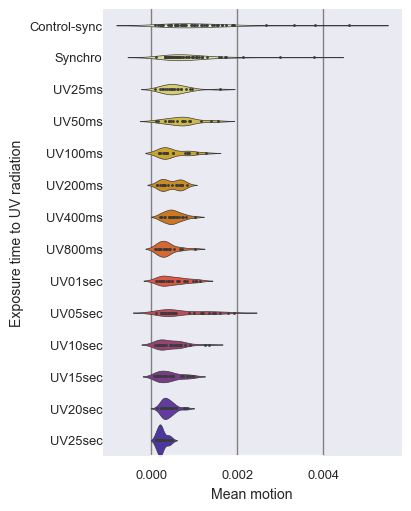

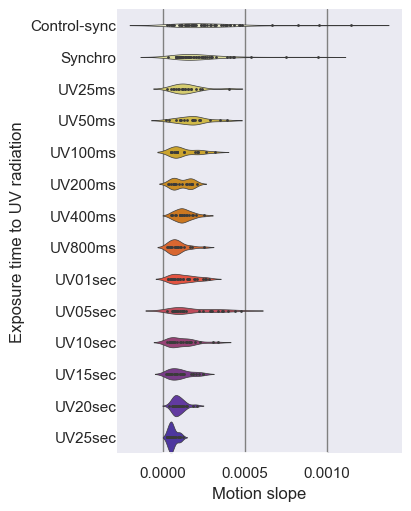

In [14]:
x_var = ['Mean motion', "Motion slope"]

for x in x_var:
    f, ax = plt.subplots(figsize=(4, 5), constrained_layout=True)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.plotting_context("paper")
    sns.set_theme(style="ticks", rc=custom_params)
    sns.set(font_scale=1)
    ax.yaxis.set_tick_params(pad=-6) 
    sns.violinplot(data=motion_dataframe, palette=sns.color_palette("CMRmap_r", 17), 
                   inner="points", order=hue_order,
                   hue_order=hue_order, bw=.5, orient="h", 
                   y="Subcategory-02", 
                   x=x, width=1, linewidth=0.5)

    # Tweak the visual presentation
    ax.xaxis.grid(True, color="gray")

    ax.set(ylabel="Exposure time to UV radiation")
    ax.set(xlabel=x)
    sns.despine(trim=True, left=True)

    format_extension = 'png'
    name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
    format_extension = 'pdf'
    name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)

In [15]:
motion_dataframe=motion_dataframe.reset_index(drop=True)

In [16]:
motion_dataframe["Exposure time"] = 0.
for i in range(len(motion_dataframe)):
    s = motion_dataframe["Subcategory-02"].iloc[i]
    if s.__contains__("Control"):
        n = -0.001
    elif s.__contains__("Synchro"):
        n = 0.
    else:
        n = float(''.join(filter(str.isdigit, s)))
        if s.__contains__("ms"):
            n = 0.001*n
    motion_dataframe.loc[[i],'Exposure time'] = n

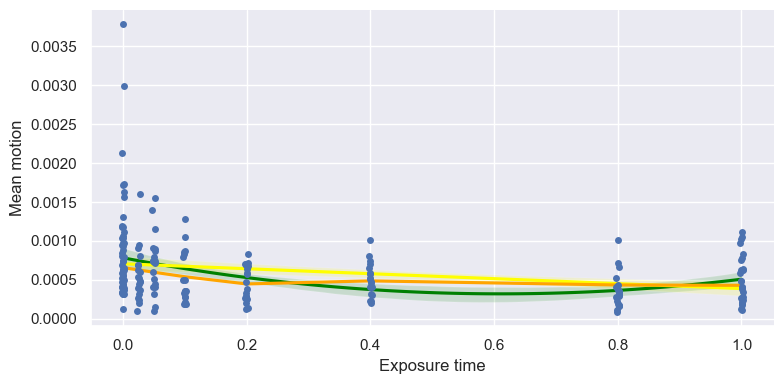

In [18]:
motion_dataframe_regression = motion_dataframe[motion_dataframe["Exposure time"]>=0]
motion_dataframe_regression = motion_dataframe_regression[motion_dataframe_regression["Exposure time"]<=1]
x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells"]

x = 'Mean motion'
f = sns.catplot(
    data = motion_dataframe_regression, x="Exposure time", y=x, 
    #hue="Subcategory-02", hue_order=hue_order, palette=sns.color_palette("CMRmap_r", 17),
    native_scale=True, height=4, aspect=2
)
sns.regplot(
    data = motion_dataframe_regression, x="Exposure time", y=x,
    scatter=False, truncate=True, order=2, color="green",#6
)
sns.regplot(
    data = motion_dataframe_regression, x="Exposure time", y=x,
    scatter=False, truncate=True, order=1, color="yellow"#2
)
sns.regplot(
    data = motion_dataframe_regression, x="Exposure time", y=x,lowess=True, 
    scatter=False, truncate=True, order=1, color="orange"
)

## Set style
custom_params = {"axes.spines.right": False, "axes.spines.top": False}    
sns.plotting_context("paper")
sns.set(font_scale=1)
sns.set_theme(style="whitegrid", rc=custom_params)

format_extension = 'png'
name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
new_name="growth_regression_firstrange_{}".format(name)
f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
format_extension = 'pdf'
name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
new_name="growth_regression_firstrange_{}".format(name)
f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)

# plt.xlim([-0.2, 1.2])
# format_extension = 'png'
# name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
# new_name="growth_regression_firstrange_lim_{}".format(name)
# f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
# format_extension = 'pdf'
# name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
# new_name="growth_regression_firstrange_lim_{}".format(name)
# f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)

## Plot the results for different wavelengths

In [19]:
wl = ["UV", "475", "568", "630"]
data = None
for w in wl:
    new_data = pd.read_csv(os.path.join(folder, "data/mitosis_CHO_{}_clean.csv".format(w)))
    ## Rename the columns to get the proper naming of the axis
    new_data = new_data.rename(columns={'mitosis': 'Number of cells', 
                                'mitosis_normalised': 'Norm. Number of cells'})
    data_peaks = quantify_peaks(new_data, 'Number of cells')
    if data is None:
        data = data_peaks
    else:
        data = pd.concat([data, data_peaks]).reset_index(drop=True)
# Integrate the information about the temporal peaks of mitosis


In [20]:
np.unique(data["Subcategory-01"])

array(['WL 475 - high density', 'WL 568 - high density',
       'WL 630 - high density', 'WL UV - high density'], dtype=object)

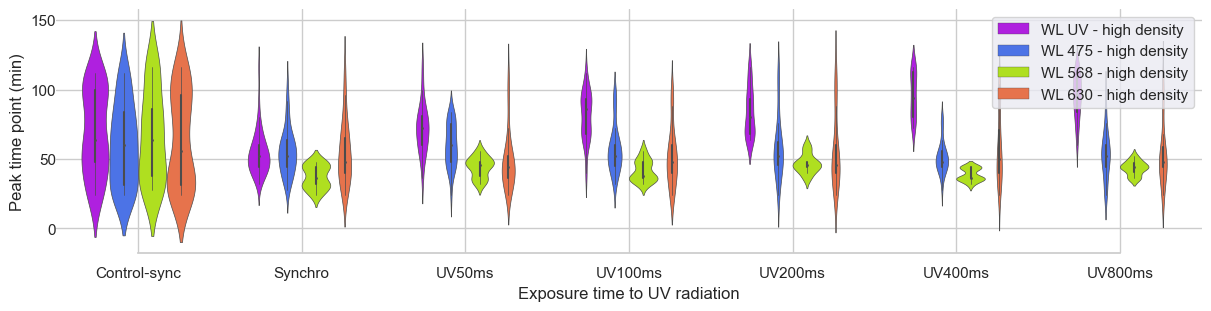

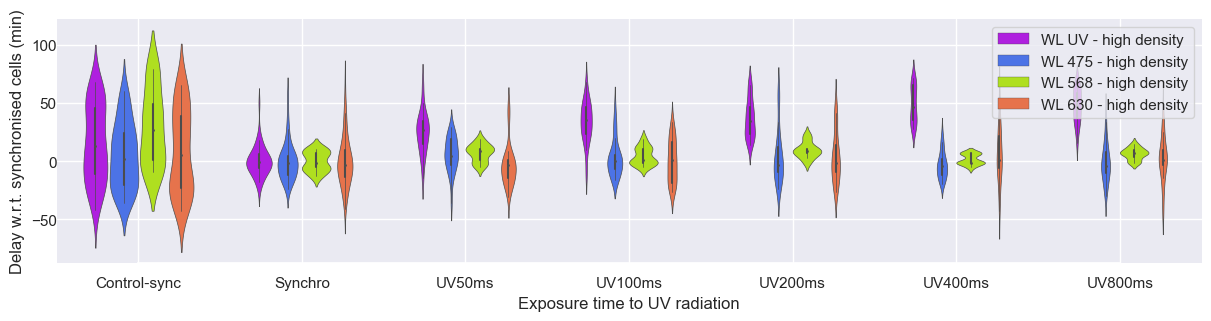

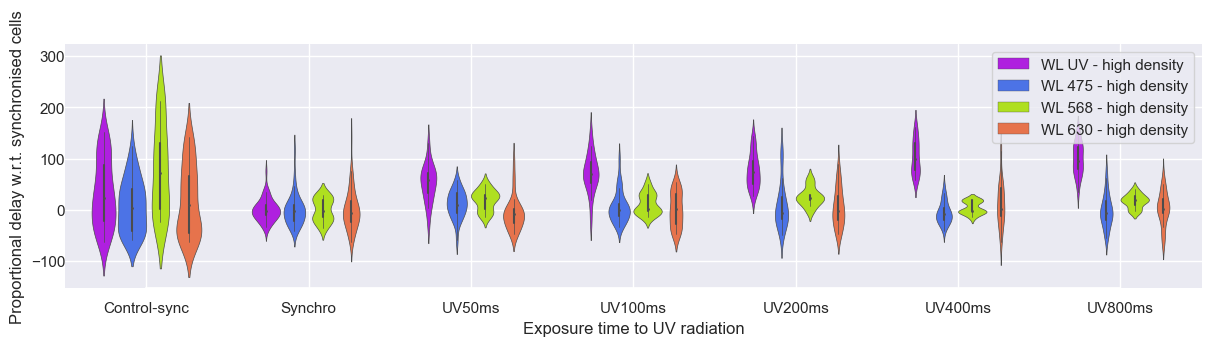

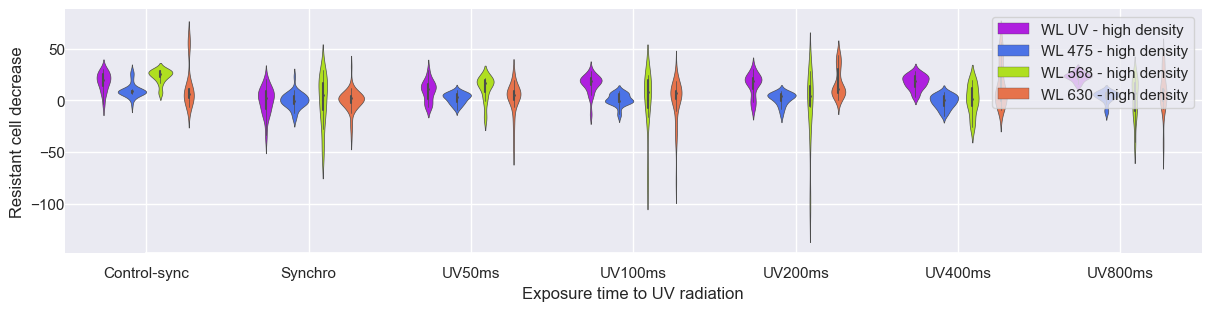

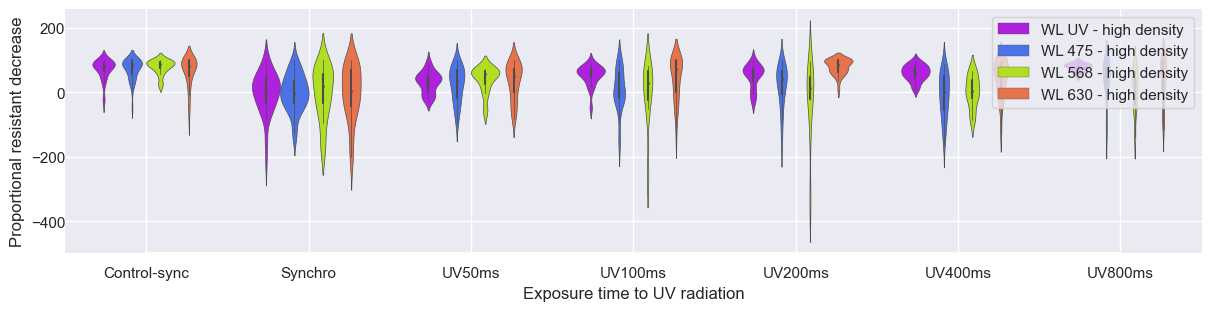

In [21]:
#### Show each distribution with both violins and points
wl=[ 'WL UV - high density', 'WL 475 - high density', 'WL 568 - high density','WL 630 - high density']
hue_order = ['Control-sync', 'Synchro', 'UV50ms', 'UV100ms', 'UV200ms', 'UV400ms', 'UV800ms']
             #'UV01sec', 'UV05sec', 'UV10sec', 'UV15sec', 'UV20sec', 'UV25sec'] 

## Rename the columns to get the proper naming in the plots
data = data.rename(columns={'peak_time': 'Peak time point (min)', 
                            'delay_synchro': 'Delay w.r.t. synchronised cells (min)',
                           'proportional_delay_synchro': 'Proportional delay w.r.t. synchronised cells'})

x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells", "Resistant cell decrease",
         "Proportional resistant decrease"]

# Create an array with the colors you want to use
colors = [ "#bf00ff", "#3366ff", "#bfff00", "#ff6633"]# Set your custom color palette
palette = sns.color_palette(colors)

for x in x_var:
    f, ax = plt.subplots(figsize=(12, 3), constrained_layout=True)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.plotting_context("paper")
    sns.set_theme(style="ticks", rc=custom_params)
    sns.set(font_scale=1)
    ax.yaxis.set_tick_params(pad=-6) 
    sns.violinplot(data=data, palette=palette,  #palette=sns.color_palette("husl", 14), 
                   bw=.5, orient="v", order=hue_order, hue_order=wl,
                   x="Subcategory-02", hue="Subcategory-01", alpha=1,
                   y=x, width=0.7, linewidth=0.5)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    plt.legend(loc="upper right")
    ax.set(xlabel="Exposure time to UV radiation")
    ax.set(ylabel=x)
    sns.despine(trim=True, left=True)

    format_extension = 'png'
    name = "{0}_wl.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
    format_extension = 'pdf'
    name = "{0}_wl.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)
